In [1]:
import sys
sys.path.insert(0,'/Users/walfits/Repositories/Aglaia/')
import extract
import Neural_net_2 as nn
import numpy as np
from sklearn import model_selection as modsel

In [2]:
coord_xyz, ene, forces = extract.load_data("/Users/walfits/Documents/aspirin/", n_samples=10000)
mean_ene = np.mean(ene)
std_ene = np.std(ene)

ene = (ene-mean_ene)/std_ene
forces = forces/std_ene
# Concatenate to it on blue crystal
# data = np.concatenate((coord_xyz, forces, np.reshape(ene, (ene.shape[0],1))), axis = 1)
# print(data.shape)
# np.savetxt('data.csv', data, delimiter=',', newline='\n')

In [3]:
print(coord_xyz.shape, ene.shape, forces.shape)

(10000, 63) (10000,) (10000, 63)


In [4]:
ene_force = np.concatenate((ene, forces), axis=1)

In [5]:
X_train, X_test, y_train, y_test = modsel.train_test_split(coord_xyz, ene_force, test_size=0.2)

In [29]:
estimator = nn.MLPRegFlow()
estimator = nn.MLPRegFlow(max_iter=300, learning_rate_init=0.02, hidden_layer_sizes=(100,), batch_size=500,
                              alpha_reg=0.0001, alpha_grad=0.023)

In [30]:
estimator.fit(X_train, y_train)

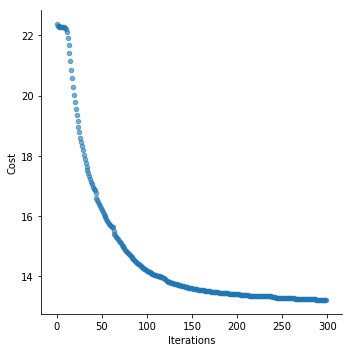

In [31]:
estimator.plot_cost()

In [32]:
ene_forces_pred = estimator.predict(X_test)

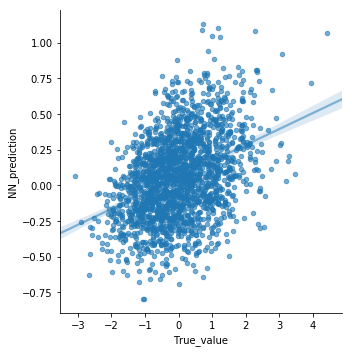

In [36]:
estimator.correlation_plot(ene_forces_pred[:, 0], y_test[:, 0])

In [37]:
estimator.score_new(X_test, y_test)

0.50203068117855087